In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sondage = pd.read_csv("real_sondage-1.csv")


In [3]:
sondage.drop('Horodateur', axis=1, inplace=True)
sondage.drop('Quelle est votre section à la SAE ?', axis=1, inplace=True)
sondage.drop('En quelle année êtes-vous à la SAE ? ', axis=1, inplace=True)


In [4]:
sondage.columns

Index(['Quel est votre sexe ?', 'Quel âge avez vous ? ',
       'Quelle est votre nationalité ?', 'Quel est votre niveau d'étude ?',
       'P1 : Quels énoncés suivants reflètent-ils votre connaissance sur le changement climatique ?  ',
       'P2 : Est-ce que vos parents vous ont sensibilisé sur le recyclage des déchets et le gaspillage énergétique. ex : éteindre les prises électriques ?',
       'P3 : Chez vous, pensez-vous à débrancher les appareils électroniques et éteindre les lumières quand vous quittez une pièce ? ',
       'P4 : faites-vous attention au temps passé sous la douche ?',
       'P5 : Selon vous, vos parents ont-ils changés leurs comportements vis-à-vis du changement climatique ?',
       'P6 : Enfant, étiez-vous inquiet du changement climatique ? ',
       'P7 : Avez-vous eu une/des conversation(s) avec vos parents en faveur de l'économie d'énergie dans votre foyer ? ',
       'T1 : De nos jours, êtes-vous d'accord avec l'inquiétude de la Suisse par rapport aux cha

In [5]:
sondage.rename(columns = {'Quel est votre sexe ?' : "Sexe", "Quel âge avez vous ? " : "Age", "Quelle est votre nationalité ?" : "Nationalité", "Quel est votre niveau d'étude ?" : "Diplome", "P1 : Quels énoncés suivants reflètent-ils votre connaissance sur le changement climatique ?  " : "P1",'P2 : Est-ce que vos parents vous ont sensibilisé sur le recyclage des déchets et le gaspillage énergétique. ex : éteindre les prises électriques ?' : "P2", 'P3 : Chez vous, pensez-vous à débrancher les appareils électroniques et éteindre les lumières quand vous quittez une pièce ? ' : "P3", 'P4 : faites-vous attention au temps passé sous la douche ?' : "P4", 'P5 : Selon vous, vos parents ont-ils changés leurs comportements vis-à-vis du changement climatique ?' : "P5", 'P6 : Enfant, étiez-vous inquiet du changement climatique ? ' : "P6", "P7 : Avez-vous eu une/des conversation(s) avec vos parents en faveur de l'économie d'énergie dans votre foyer ? " : "P7", "T1 : De nos jours, êtes-vous d'accord avec l'inquiétude de la Suisse par rapport aux changements climatiques  ? " : "T1", "T2 :  Êtes-vous d'accord de faire des économies d'énergie pour la Suisse ? " : "T2", "T3: Êtes-vous d'accord de ne pas avoir accès à l’électricité en cas de pénurie ? " : "T3", "T4 :   Êtes-vous d'accord à limiter le chauffage à 20 degrés dans votre foyer ? " : "T4", "T5 : Comment jugez-vous votre capacité à faire face aux difficultés et aux défis liés au changement climatique ?" : "T5", "T6 : Quel est votre niveau de résilience actuel face aux changements et demandes du gouvernement Suisse sur l'économie d'électricité ?" : "T6", "T7 : Comment décririez-vous votre niveau d'optimisme face aux difficultés que vous pourrez rencontrez face aux changement climatique ?" : "T7", "T8 : Comment décririez-vous votre capacité à faire preuve de flexibilité et d'adaptabilité face aux changements climatiques et énergétiques ?" : "T8", "T9 : Comment gérez-vous les situations stressantes liées au changement climatique, comme les catastrophes naturelles ou les pénuries de ressources ?" : "T9", "T10 : Etes-vous d'accord avec l'affirmation suivante : Je suis capable de trouver des solutions créatives aux problèmes liés au changement climatique sur le plan personnel et professionnel ? \n" : "T10", "T11 : Pensez-vous que la Suisse va pouvoir s’auto-suffire en énergie d'ici 2050 ?" : "T11"}, inplace=True)

In [6]:
#sondage.columns

In [7]:
sondage.head(1)

,Sexe,Age,Nationalité,Diplome,P1,P2,P3,P4,P5,P6,...,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11
0,Homme,21 - 25,Etrangère,Baccalauréat Francais,J'ai reçu des cours de sensibilisation sur le ...,Oui,"Oui, ça m'arrive",Non,Oui,Oui,...,d'accord,neutre,d'accord,Moyen,"Résilience moyenne, je suis prêt à m'investir ...",Optimiste,Flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Peu d'accord,Plutôt d'accord
1,Femme,18 - 20,Suisse,Maturité Gymnasial,Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Oui,Oui,Oui,...,très d'accord,totalement en désaccord,très d'accord,Fort,"Haute Résilience, je coupe chaque appareil éle...",Neutre,Flexible,Je m'inquiète beaucoup et j'ai du mal à m'en r...,Plutôt d'accord,Plutôt d'accord
2,Femme,26 - 30,Suisse,Certificat fédéral de capacité (CFC),Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Non,Non,Non,...,d'accord,désaccord,d'accord,Moyen,"Résilience légère, tant qu'on me coupe pas l'é...",Neutre,Flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Plutôt d'accord,Peu d'accord
3,Femme,21 - 25,Suisse,Professional Bullshitter (Art Diploma),J'ai reçu des cours de sensibilisation sur le ...,Oui,"Oui, ça m'arrive",Oui,Non,Non,...,très d'accord,d'accord,très d'accord,Très fort,"Résilience moyenne, je suis prêt à m'investir ...",Neutre,Flexible,Je suis en mesure de surmonter les difficultés...,Plutôt d'accord,Ni d'accord ni de désaccord
4,Homme,21 - 25,Suisse,Maturité Gymnasial,Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Oui,Oui,Oui,...,très d'accord,neutre,très d'accord,Très fort,"Haute Résilience, je coupe chaque appareil éle...",Très optimiste,Très flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Tout à fait d'accord,Plutôt d'accord


JE DEFINIS LES FONCTIONS UTILES POUR LE SCORE DE CONSCIENCE SUR 10

In [9]:
sondage["P4"] = sondage['P4'].str.strip()
sondage["P5"] = sondage['P5'].str.strip()

In [10]:
def tran_P1(x):
    if x == "Je me suis renseigné(e) sur le changement climatique et ses conséquences.":
        return 3
    if x == "J'ai reçu des cours de sensibilisation sur le changement climatique à l'école.":
        return 2
    if x == "Je reçois seulement des informations venant des médias classiques.":
        return 1
    if x == "Le sujet ne m'intéresse pas.":
        return 0
    

In [11]:
def tran_P2(x):
    if x == "Oui":
        return 1
    if x == "Non":
        return 0

In [12]:
def tran_P3(x):
    if x == "Oui, tout le temps":
        return 2
    if x == "Oui, ça m'arrive":
        return 1
    if x == "Non, je n'y pense pas":
        return 0

In [13]:
def tran_P4(x):
    if x == "Oui":
        return 1
    if x == "Non":
        return 0

In [14]:
def tran_P5(x):
    if x == "Oui":
        return 1
    if x == "Non":
        return 0

In [15]:
def tran_P6(x):
    if x == "Oui":
        return 1
    if x == "Non":
        return 0

In [16]:
def tran_P7(x):
    if x == "Oui":
        return 1
    if x == "Non":
        return 0

In [17]:
sondage["Score-Conscience"] = sondage["P1"].apply(tran_P1) +  sondage["P2"].apply(tran_P2) + sondage["P3"].apply(tran_P3) + sondage["P4"].apply(tran_P4) + sondage["P5"].apply(tran_P5) + sondage["P6"].apply(tran_P6) + sondage["P7"].apply(tran_P7) 

DEFINITION FUNCTION POUR LECHELLE DE LIKERT


In [20]:
def tran_T1(x):
    if x == "très d'accord":
        return 5
    if x == "d'accord":
        return 4
    if x == "neutre":
        return 3
    if x == "désaccord":
        return 2
    if x == "totalement en désaccord":
        return 1

In [21]:
def tran_T2(x):
    if x == "très d'accord":
        return 5
    if x == "d'accord":
        return 4
    if x == "neutre":
        return 3
    if x == "désaccord":
        return 2
    if x == "totalement en désaccord":
        return 1

In [22]:
def tran_T3(x):
    if x == "très d'accord":
        return 5
    if x == "d'accord":
        return 4
    if x == "neutre":
        return 3
    if x == "désaccord":
        return 2
    if x == "totalement en désaccord":
        return 1

In [23]:
def tran_T4(x):
    if x == "très d'accord":
        return 5
    if x == "d'accord":
        return 4
    if x == "neutre":
        return 3
    if x == "désaccord":
        return 2
    if x == "totalement en désaccord":
        return 1

In [24]:
def tran_T5(x):
    if x == "Très fort":
        return 5
    if x == "Fort":
        return 4
    if x == "Moyen":
        return 3
    if x == "Faible":
        return 2
    if x == "Très faible":
        return 1

In [25]:
def tran_T6(x):
    if x == "Haute Résilience, je coupe chaque appareil électrique après utilisation et chauffage.":
        return 5
    if x == "Résilience légère, tant qu'on me coupe pas l'électricité.":
        return 4
    if x == "Résilience moyenne, je suis prêt à m'investir un minimum et réduire ma consommation.":
        return 3
    if x == "Peu de résilience , je suis prêt à m'investir que si l'on m'y force.":
        return 2
    if x == "Aucune résilience, je refuse de m'adapter.":
        return 1

In [26]:
def tran_T7(x):
    if x == "Très optimiste":
        return 5
    if x == "Optimiste":
        return 4
    if x == "Neutre":
        return 3
    if x == "Pessimiste":
        return 2
    if x == "Très pessimiste":
        return 1

In [27]:
def tran_T8(x):
    if x == "Très flexible":
        return 5
    if x == "Flexible":
        return 4
    if x == "Ni flexible ni inflexible":
        return 3
    if x == "Inflexible":
        return 2
    if x == "Très inflexible":
        return 1

In [28]:
def tran_T9(x):
    if x == "Je suis en mesure de surmonter les difficultés de manière positive.":
        return 5
    if x == "Je gère le stress de manière efficace et je m'adapte rapidement aux changements":
        return 4
    if x == "Je m'inquiète un peu, mais je finis par m'en remettre.":
        return 3
    if x == "Je m'inquiète beaucoup et j'ai du mal à m'en remettre.":
        return 2
    if x == "Je m'effondre et je me sens incapable de faire face.":
        return 1

In [29]:
def tran_T10(x):
    if x == "Tout à fait d'accord":
        return 5
    if x == "Plutôt d'accord":
        return 4
    if x == "Ni d'accord ni de désaccord":
        return 3
    if x == "Peu d'accord":
        return 2
    if x == "Pas du tout d'accord":
        return 1

In [30]:
def tran_T11(x):
    if x == "Tout à fait d'accord":
        return 5
    if x == "Plutôt d'accord":
        return 4
    if x == "Ni d'accord ni de désaccord":
        return 3
    if x == "Peu d'accord":
        return 2
    if x == "Pas du tout d'accord":
        return 1

In [31]:
sondage["Score-Likert"] = sondage["T1"].apply(tran_T1) + sondage["T2"].apply(tran_T2) + sondage["T3"].apply(tran_T3) + sondage["T4"].apply(tran_T4) + sondage["T5"].apply(tran_T5) + sondage["T6"].apply(tran_T6) + sondage["T7"].apply(tran_T7) + sondage["T8"].apply(tran_T8) + sondage["T9"].apply(tran_T9) + sondage["T10"].apply(tran_T10) + sondage["T11"].apply(tran_T11)    

In [32]:
sondage["Moyenne"] = sondage["Score-Likert"] / 11

In [33]:
sondage

,Sexe,Age,Nationalité,Diplome,P1,P2,P3,P4,P5,P6,...,T5,T6,T7,T8,T9,T10,T11,Score-Conscience,Score-Likert,Moyenne
0,Homme,21 - 25,Etrangère,Baccalauréat Francais,J'ai reçu des cours de sensibilisation sur le ...,Oui,"Oui, ça m'arrive",Non,Oui,Oui,...,Moyen,"Résilience moyenne, je suis prêt à m'investir ...",Optimiste,Flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Peu d'accord,Plutôt d'accord,6,38,3.454545
1,Femme,18 - 20,Suisse,Maturité Gymnasial,Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Oui,Oui,Oui,...,Fort,"Haute Résilience, je coupe chaque appareil éle...",Neutre,Flexible,Je m'inquiète beaucoup et j'ai du mal à m'en r...,Plutôt d'accord,Plutôt d'accord,10,42,3.818182
2,Femme,26 - 30,Suisse,Certificat fédéral de capacité (CFC),Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Non,Non,Non,...,Moyen,"Résilience légère, tant qu'on me coupe pas l'é...",Neutre,Flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Plutôt d'accord,Peu d'accord,7,38,3.454545
3,Femme,21 - 25,Suisse,Professional Bullshitter (Art Diploma),J'ai reçu des cours de sensibilisation sur le ...,Oui,"Oui, ça m'arrive",Oui,Non,Non,...,Très fort,"Résilience moyenne, je suis prêt à m'investir ...",Neutre,Flexible,Je suis en mesure de surmonter les difficultés...,Plutôt d'accord,Ni d'accord ni de désaccord,5,46,4.181818
4,Homme,21 - 25,Suisse,Maturité Gymnasial,Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Oui,Oui,Oui,...,Très fort,"Haute Résilience, je coupe chaque appareil éle...",Très optimiste,Très flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Tout à fait d'accord,Plutôt d'accord,10,50,4.545455
5,Homme,18 - 20,Suisse,Maturité Gymnasial,Je reçois seulement des informations venant de...,Oui,"Oui, tout le temps",Oui,Oui,Oui,...,Moyen,"Résilience légère, tant qu'on me coupe pas l'é...",Pessimiste,Ni flexible ni inflexible,"Je m'inquiète un peu, mais je finis par m'en r...",Ni d'accord ni de désaccord,Peu d'accord,8,36,3.272727
6,Homme,21 - 25,Suisse,Autre,Je reçois seulement des informations venant de...,Non,"Non, je n'y pense pas",Non,Non,Non,...,Très faible,"Résilience légère, tant qu'on me coupe pas l'é...",Neutre,Ni flexible ni inflexible,Je suis en mesure de surmonter les difficultés...,Ni d'accord ni de désaccord,Ni d'accord ni de désaccord,2,40,3.636364
7,Femme,18 - 20,Suisse,Certificat de culture générale,Je reçois seulement des informations venant de...,Non,"Oui, ça m'arrive",Non,Non,Non,...,Moyen,"Résilience moyenne, je suis prêt à m'investir ...",Neutre,Ni flexible ni inflexible,"Je m'inquiète un peu, mais je finis par m'en r...",Ni d'accord ni de désaccord,Plutôt d'accord,2,32,2.909091
8,Homme,26 - 30,Suisse,Bachelor,Je me suis renseigné(e) sur le changement clim...,Non,"Oui, tout le temps",Non,Non,Non,...,Moyen,"Résilience légère, tant qu'on me coupe pas l'é...",Pessimiste,Flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Ni d'accord ni de désaccord,Tout à fait d'accord,5,40,3.636364
9,Homme,21 - 25,Etrangère,Maturité Gymnasial,Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, ça m'arrive",Oui,Non,Oui,...,Moyen,"Résilience moyenne, je suis prêt à m'investir ...",Optimiste,Flexible,Je gère le stress de manière efficace et je m'...,Plutôt d'accord,Peu d'accord,8,36,3.272727


In [34]:
sondage

,Sexe,Age,Nationalité,Diplome,P1,P2,P3,P4,P5,P6,...,T5,T6,T7,T8,T9,T10,T11,Score-Conscience,Score-Likert,Moyenne
0,Homme,21 - 25,Etrangère,Baccalauréat Francais,J'ai reçu des cours de sensibilisation sur le ...,Oui,"Oui, ça m'arrive",Non,Oui,Oui,...,Moyen,"Résilience moyenne, je suis prêt à m'investir ...",Optimiste,Flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Peu d'accord,Plutôt d'accord,6,38,3.454545
1,Femme,18 - 20,Suisse,Maturité Gymnasial,Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Oui,Oui,Oui,...,Fort,"Haute Résilience, je coupe chaque appareil éle...",Neutre,Flexible,Je m'inquiète beaucoup et j'ai du mal à m'en r...,Plutôt d'accord,Plutôt d'accord,10,42,3.818182
2,Femme,26 - 30,Suisse,Certificat fédéral de capacité (CFC),Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Non,Non,Non,...,Moyen,"Résilience légère, tant qu'on me coupe pas l'é...",Neutre,Flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Plutôt d'accord,Peu d'accord,7,38,3.454545
3,Femme,21 - 25,Suisse,Professional Bullshitter (Art Diploma),J'ai reçu des cours de sensibilisation sur le ...,Oui,"Oui, ça m'arrive",Oui,Non,Non,...,Très fort,"Résilience moyenne, je suis prêt à m'investir ...",Neutre,Flexible,Je suis en mesure de surmonter les difficultés...,Plutôt d'accord,Ni d'accord ni de désaccord,5,46,4.181818
4,Homme,21 - 25,Suisse,Maturité Gymnasial,Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, tout le temps",Oui,Oui,Oui,...,Très fort,"Haute Résilience, je coupe chaque appareil éle...",Très optimiste,Très flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Tout à fait d'accord,Plutôt d'accord,10,50,4.545455
5,Homme,18 - 20,Suisse,Maturité Gymnasial,Je reçois seulement des informations venant de...,Oui,"Oui, tout le temps",Oui,Oui,Oui,...,Moyen,"Résilience légère, tant qu'on me coupe pas l'é...",Pessimiste,Ni flexible ni inflexible,"Je m'inquiète un peu, mais je finis par m'en r...",Ni d'accord ni de désaccord,Peu d'accord,8,36,3.272727
6,Homme,21 - 25,Suisse,Autre,Je reçois seulement des informations venant de...,Non,"Non, je n'y pense pas",Non,Non,Non,...,Très faible,"Résilience légère, tant qu'on me coupe pas l'é...",Neutre,Ni flexible ni inflexible,Je suis en mesure de surmonter les difficultés...,Ni d'accord ni de désaccord,Ni d'accord ni de désaccord,2,40,3.636364
7,Femme,18 - 20,Suisse,Certificat de culture générale,Je reçois seulement des informations venant de...,Non,"Oui, ça m'arrive",Non,Non,Non,...,Moyen,"Résilience moyenne, je suis prêt à m'investir ...",Neutre,Ni flexible ni inflexible,"Je m'inquiète un peu, mais je finis par m'en r...",Ni d'accord ni de désaccord,Plutôt d'accord,2,32,2.909091
8,Homme,26 - 30,Suisse,Bachelor,Je me suis renseigné(e) sur le changement clim...,Non,"Oui, tout le temps",Non,Non,Non,...,Moyen,"Résilience légère, tant qu'on me coupe pas l'é...",Pessimiste,Flexible,"Je m'inquiète un peu, mais je finis par m'en r...",Ni d'accord ni de désaccord,Tout à fait d'accord,5,40,3.636364
9,Homme,21 - 25,Etrangère,Maturité Gymnasial,Je me suis renseigné(e) sur le changement clim...,Oui,"Oui, ça m'arrive",Oui,Non,Oui,...,Moyen,"Résilience moyenne, je suis prêt à m'investir ...",Optimiste,Flexible,Je gère le stress de manière efficace et je m'...,Plutôt d'accord,Peu d'accord,8,36,3.272727


8


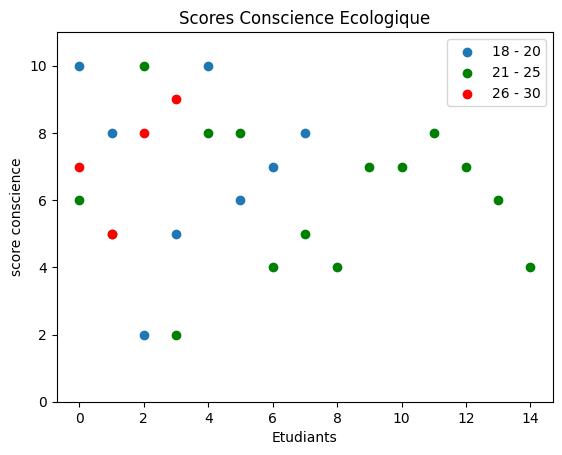

In [35]:
z = sondage.loc[sondage["Age"]=="18 - 20"]
y = z["Score-Conscience"] 
x = range(len(z.index))
print(len(z.index))
plt.ylabel('score conscience')
plt.xlabel('Etudiants')
# AFFICHER LE SCORE MAX
plt.gca().set_ylim([0,11])

plt.scatter(x, y, label='18 - 20')
#ETUDIANT 2 ANNEE
z = sondage.loc[sondage["Age"]=="21 - 25"]
y = z["Score-Conscience"] 
x = range(len(z.index))
plt.scatter(x,y, c="g" ,label='21 - 25')
#ETUDIANT 3 ANNEE
z = sondage.loc[sondage["Age"]=="26 - 30"]
y = z["Score-Conscience"] 
x = range(len(z.index))
plt.scatter(x,y, c="r", label='26 - 30')
plt.title('Scores Conscience Ecologique')
plt.legend()
plt.show()

19


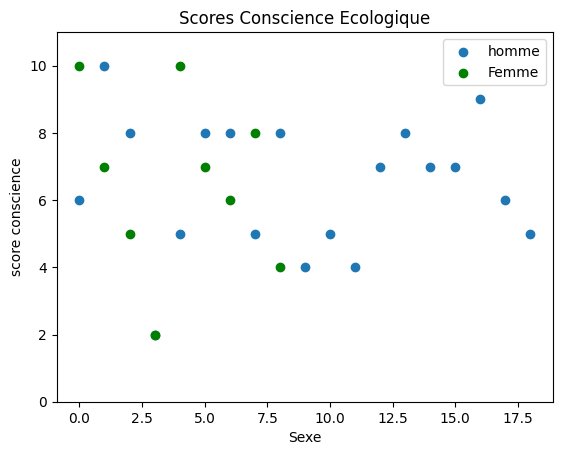

In [41]:
z = sondage.loc[sondage["Sexe"]=="Homme"]
y = z["Score-Conscience"] 
x = range(len(z.index))
print(len(z.index))
plt.ylabel('score conscience')
plt.xlabel('Sexe')
# AFFICHER LE SCORE MAX
plt.gca().set_ylim([0,11])
plt.scatter(x, y, label="homme")
#FEMME
z = sondage.loc[sondage["Sexe"]=="Femme"]
y = z["Score-Conscience"] 
x = range(len(z.index))
plt.scatter(x,y, c="g" ,label='Femme')
plt.title('Scores Conscience Ecologique')
plt.legend()
plt.show()

In [50]:
femme = sondage.loc[sondage["Sexe"]=="Femme"]["Moyenne"].mean()
homme = sondage.loc[sondage["Sexe"]=="Homme"]["Moyenne"].mean()
print(femme)
print(homme)

3.606060606060606
3.583732057416268


In [37]:
header = ["Sexe","Age", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "T11"]
sondage.to_csv('output_2023_april.csv', columns = header)